In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import shap
from sklearn.metrics import accuracy_score
import numpy as np
shap.initjs()


In [2]:
iris = load_iris()


In [3]:
df_iris = pd.DataFrame(iris.data, columns=[columns.replace(" ", "_") for columns in iris.feature_names])
df_iris["target"] = iris.target
df_iris["target_name"] = pd.Categorical.from_codes(iris.target, iris.target_names)

df_iris


,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [4]:
X = df_iris.filter(regex="cm", axis=1)
y = df_iris.target


In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

model = SVC(probability=True).fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)


0.9555555555555556

In [6]:
explainer = shap.KernelExplainer(model.predict_proba, X_train, link="logit")
shap_values = explainer.shap_values(X_train)


X does not have valid feature names, but SVC was fitted with feature names
Using 105 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/105 [00:00<?, ?it/s]

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

Comportamento peso para cada **feature** para concluir que não é uma **versicolor** (`1`) para a amostra `86`

In [7]:
shap.force_plot(explainer.expected_value[1], shap_values[1][86], X_train.iloc[86])

diagrama mais completo que o anterior, pois entra **todas as amostra** para definir se é uma **versicolor** (`1`).

In [8]:
shap.force_plot(explainer.expected_value[1], shap_values[1], X_train)

Peso das **Features** para determinar se é uma **virginica** (`2`)

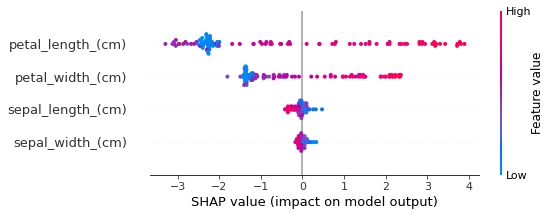

In [9]:
shap.summary_plot(shap_values[2], X_train)


Mostra a chance de ser uma **setosa** (`0`) de acordo com a **feature** `petal_length_(cm)`

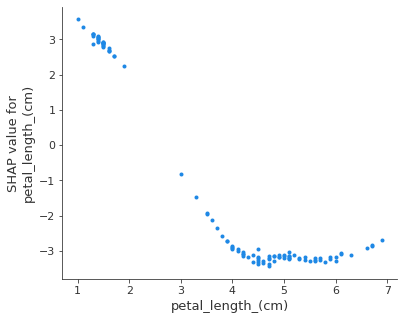

In [10]:
shap.dependence_plot("petal_length_(cm)", shap_values[0], X_train, interaction_index=None)


O mesmo que o anterior porem com 2 **features** para entender a relação das duas na decisão

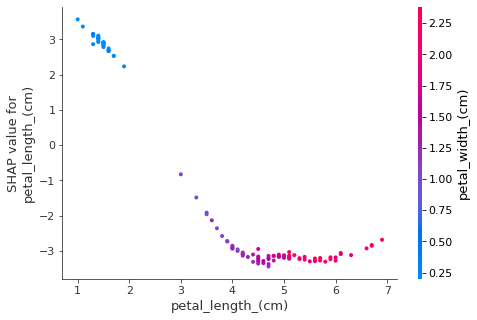

In [11]:
shap.dependence_plot("petal_length_(cm)", shap_values[0], X_train, interaction_index="petal_width_(cm)")